In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data from CSV file
osmancik = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS3BM12mHjzzSa-Dhv0QVqHrHVEur5JeDKy_gs1JU9N-3Z7LRXD_KczWaqDGjnutjNzLOjLzRwzuFMk/pub?gid=995012296&single=true&output=csv')

In [3]:
# Dataset Info
osmancik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [4]:
# Top 5 data
osmancik.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
# Show count missing value
osmancik.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [6]:
# Show class data count
osmancik['Class'].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [7]:
# Encode Class
Class = {'Osmancik': 0,'Cammeo': 1}
osmancik.Class = [Class[item] for item in osmancik.Class]
osmancik.Class.value_counts()

0    2180
1    1630
Name: Class, dtype: int64

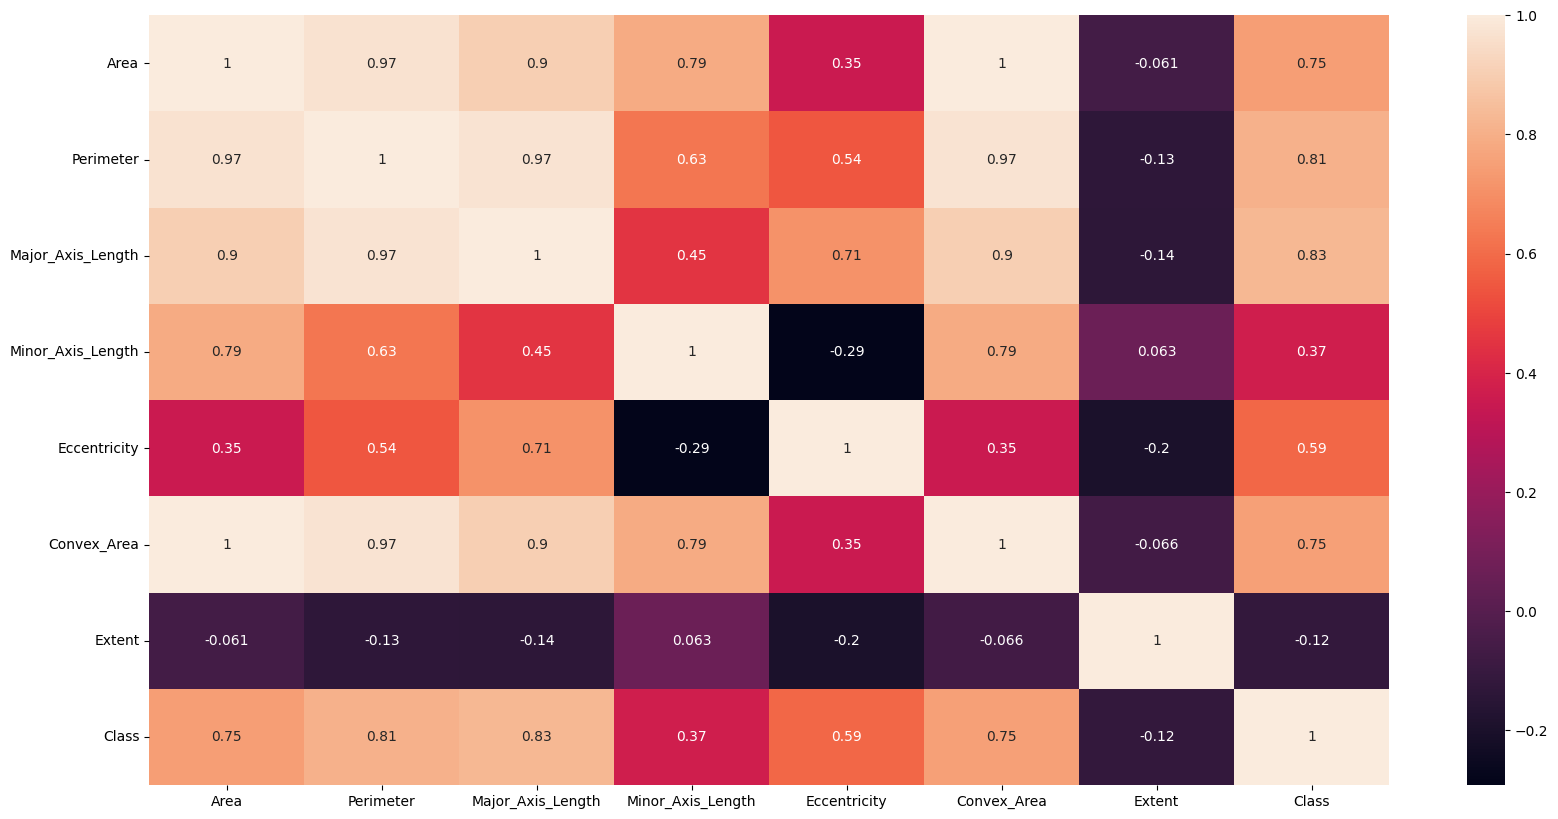

In [8]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(osmancik.corr(),annot=True)
plt.show()

In [9]:
# Select Attribute X and Y
X = osmancik.iloc[:, 1:3].values
y = osmancik.iloc[:, 7].values

In [10]:
X

array([[525.5789795, 229.7498779],
       [494.3110046, 206.0200653],
       [501.1220093, 214.106781 ],
       ...,
       [442.4989929, 183.5729218],
       [392.2969971, 161.193985 ],
       [404.7099915, 161.0792694]])

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear', random_state=0) # classifier linear
classifier_non_linear = SVC(kernel='rbf') # classifier non-linear using rbf
classifier_linear.fit(X_train, y_train) # train linear
classifier_non_linear.fit(X_train, y_train)# train non-linear

SVC()

In [15]:
# Predicting the Test set results
y_pred_linear = classifier_linear.predict(X_test) # test linear
y_pred_non_linear = classifier_non_linear.predict(X_test) # test non-linear

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_linear = confusion_matrix(y_test, y_pred_linear) # confusion matrix linear
cm_non_linear = confusion_matrix(y_test, y_pred_non_linear) # confusion matrix non-linear

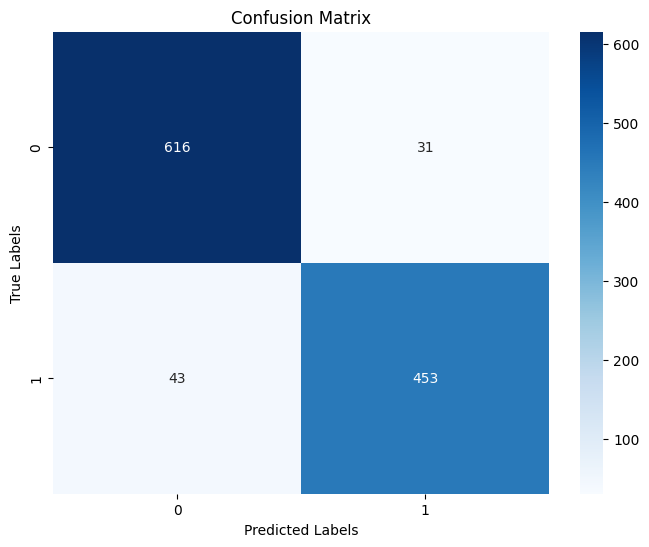

In [17]:
# Visualizing the Confusion Matrix linear
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

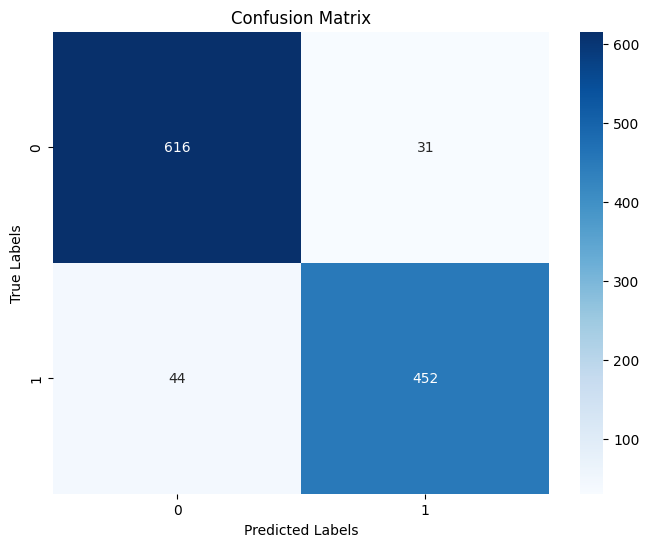

In [18]:
# Visualizing the Confusion Matrix non-linear
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_non_linear, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-19-b3156b68f8e7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


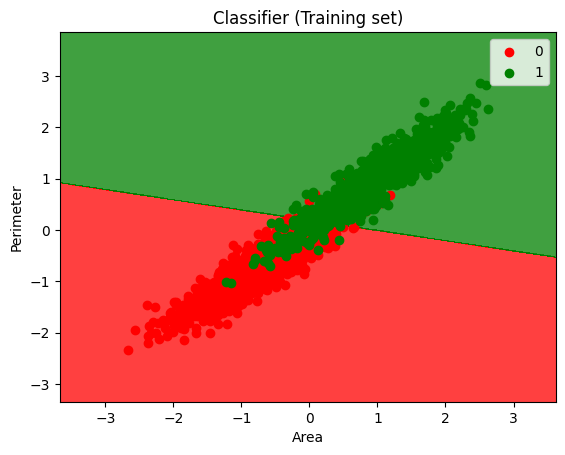

In [19]:
# Visualising the Training set results of Linear Classifier
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

<ipython-input-20-d538a06eb919>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


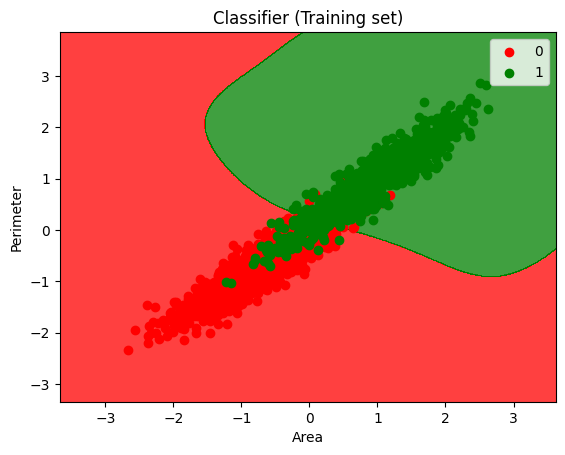

In [20]:
# Visualising the Training set results of non-linear Classifier
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_non_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()